### PROJET - EXPLORATION DES DONNEES + DATAVIZ

Importation des librairies

In [181]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

from PIL import Image, ImageChops
import os
import random
from scipy.stats import f_oneway, levene, shapiro, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd



Importation des metadata et infos de ceux-ci

In [36]:
covid = pd.read_excel('/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/COVID.metadata.xlsx')

lung_opacity = pd.read_excel('/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/Lung_Opacity.metadata.xlsx')

normal = pd.read_excel('/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/Normal.metadata.xlsx')

viral_pneumonia = pd.read_excel('/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/Viral_Pneumonia.metadata.xlsx')

In [37]:
#afficher les infos covid
display(covid.info())
print("----------------------")

#afficher les infos de normal
display(normal.info())
print("----------------------")

#afficher les infos de lung_opacity
display(lung_opacity.info())
print("----------------------")

#afficher les infos de viral_pneumonia
display(viral_pneumonia.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FILE NAME  3616 non-null   object
 1   FORMAT     3616 non-null   object
 2   SIZE       3616 non-null   object
 3   URL        3616 non-null   object
dtypes: object(4)
memory usage: 113.1+ KB


None

----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10192 entries, 0 to 10191
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FILE NAME  10192 non-null  object
 1   FORMAT     10192 non-null  object
 2   SIZE       10192 non-null  object
 3   URL        10192 non-null  object
dtypes: object(4)
memory usage: 318.6+ KB


None

----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FILE NAME  6012 non-null   object
 1   FORMAT     6012 non-null   object
 2   SIZE       6012 non-null   object
 3   URL        6012 non-null   object
dtypes: object(4)
memory usage: 188.0+ KB


None

----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FILE NAME  1345 non-null   object
 1   FORMAT     1345 non-null   object
 2   SIZE       1345 non-null   object
 3   URL        1345 non-null   object
dtypes: object(4)
memory usage: 42.2+ KB


None

Les metadatas ont les mêmes colonnes par conséquent on va les concaténer en un seul dataframe

In [39]:
#concaténation des 4 dataframes
df  = pd.concat([covid, normal, lung_opacity, viral_pneumonia], ignore_index=True, join='inner')

#On renomme la colonne 'FILE NAME' en 'FILE_NAME' (pas fan des espaces)
df = df.rename(columns={'FILE NAME': 'FILE_NAME'})

df

,FILE_NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
...,...,...,...,...
21160,Viral Pneumonia-1341,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
21161,Viral Pneumonia-1342,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
21162,Viral Pneumonia-1343,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
21163,Viral Pneumonia-1344,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


Analyse exploratoire Metadata

In [41]:
#Création d'une colonne 'FILE SOURCE' dans laquelle on précise de quelle dataset provient le fichier
df['FILE_SOURCE'] = df['FILE_NAME'].str.split('-').str[0]

In [35]:
#On vérifie si cela a fonctionné en affichant les valeurs uniques 'FILE SOURCE'
df['FILE SOURCE'].unique()

array(['COVID', 'NORMAL', 'Lung_Opacity', 'Viral Pneumonia'], dtype=object)

In [84]:
#On sait aussi que les colonnes FORMAT et SIZE ont une unique valeur
print("Format :",df['FORMAT'].unique())
print("Résolution :",df['SIZE'].unique())

Format : ['PNG']
Résolution : ['256*256']


In [50]:
# On va donc s'intéresser aux URL d'où proviennent les données

#On affiche pour chaque source de metadata, le nombre d'URL unique d'où proviennent les données
file_source_unique_url_counts = df.groupby('FILE_SOURCE')['URL'].nunique()
file_source_unique_url_counts

FILE_SOURCE
COVID              6
Lung_Opacity       1
NORMAL             2
Viral Pneumonia    1
Name: URL, dtype: int64

In [85]:
#On fait une représentation graphique du précédent output

# Définir une palette de couleurs avec quatre couleurs
colors = ['salmon', 'peachpuff', 'mediumseagreen', 'orange']

# Créer les données pour le diagramme en barres
data = [
    go.Bar(
        x=file_source_unique_url_counts.index,  # FILE_SOURCE
        y=file_source_unique_url_counts.values,  # Nombre d'URLs uniques
        marker=dict(color=colors)  # Définir la palette de couleurs
    )
]

# Créer la mise en page du diagramme
layout = go.Layout(
    title='Nombre de références par metadata',
    title_x=0.5,
    xaxis=dict(title='Metadata'),
    yaxis=dict(title='Nombre d\'URLs uniques')
)

# Créer la figure
fig = go.Figure(data=data, layout=layout)

# Afficher la figure
fig.show()

Analyse exploratoire des images 

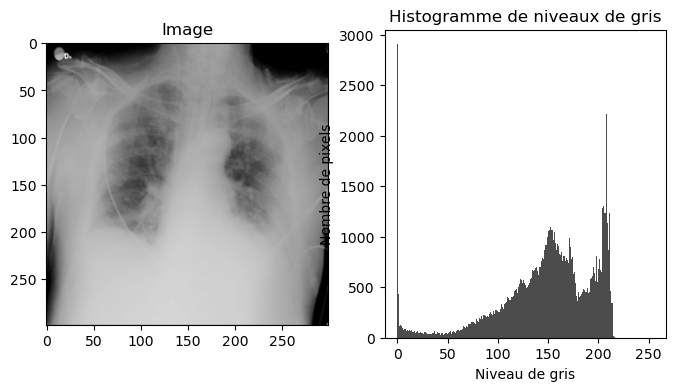

In [69]:
# Charger une image
image_path = "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/COVID-1.png"
image = Image.open(image_path).convert("L")  # Convertir en niveaux de gris

# Afficher l'image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Image')


# Afficher l'histogramme
plt.subplot(1, 2, 2)
plt.hist(image.getdata(), bins=256, color='black', alpha=0.7)
plt.title('Histogramme de niveaux de gris')
plt.xlabel('Niveau de gris')
plt.ylabel('Nombre de pixels')

plt.show()



Inspection de 4 images de patients atteint de COVID, sains, présentant une opacité pulmonaire et atteint d'une pneumonie virale

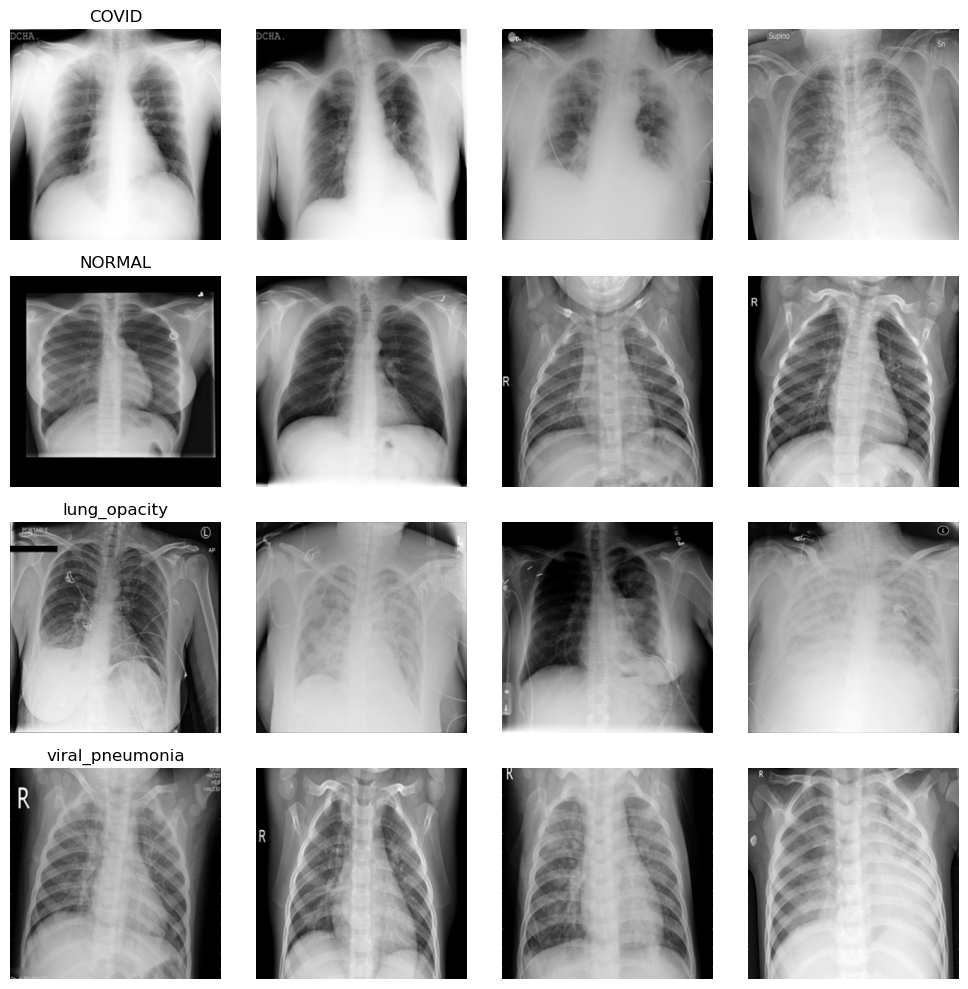

In [88]:
# Chemin vers les répertoires contenant les images de chaque catégorie
directories = {
    "COVID": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/COVID",
    "NORMAL": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/NORMAL",
    "lung_opacity": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/lung_opacity",
    "viral_pneumonia": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/viral_pneumonia"
}

# Création de la figure
plt.figure(figsize=(10, 10))

# Parcourir les répertoires et afficher quatre images aléatoires de chaque catégorie
for i, (category, directory) in enumerate(directories.items(), 1):
    # Lister les fichiers dans le répertoire
    files = os.listdir(directory)
    # Sélectionner quatre images aléatoires de la catégorie
    random_files = random.sample(files, 4)
    # Afficher les quatre images
    for j, file in enumerate(random_files, 1):
        # Construire le chemin d'accès complet de l'image
        image_path = os.path.join(directory, file)
        # Charger l'image
        image = Image.open(image_path)
        # Ajouter l'image à la figure
        plt.subplot(4, 4, (i-1)*4 + j)
        plt.imshow(image, cmap='gray')
        plt.title(category if j == 1 else '')  # Ne montrer le titre que pour la première image de chaque catégorie
        plt.axis('off')

# Afficher la figure
plt.tight_layout()
plt.show()

Inspection des niveaux de gris pour 4 images de patients atteint de COVID, sains, présentant une opacité pulmonaire et atteint d'une pneumonie virale

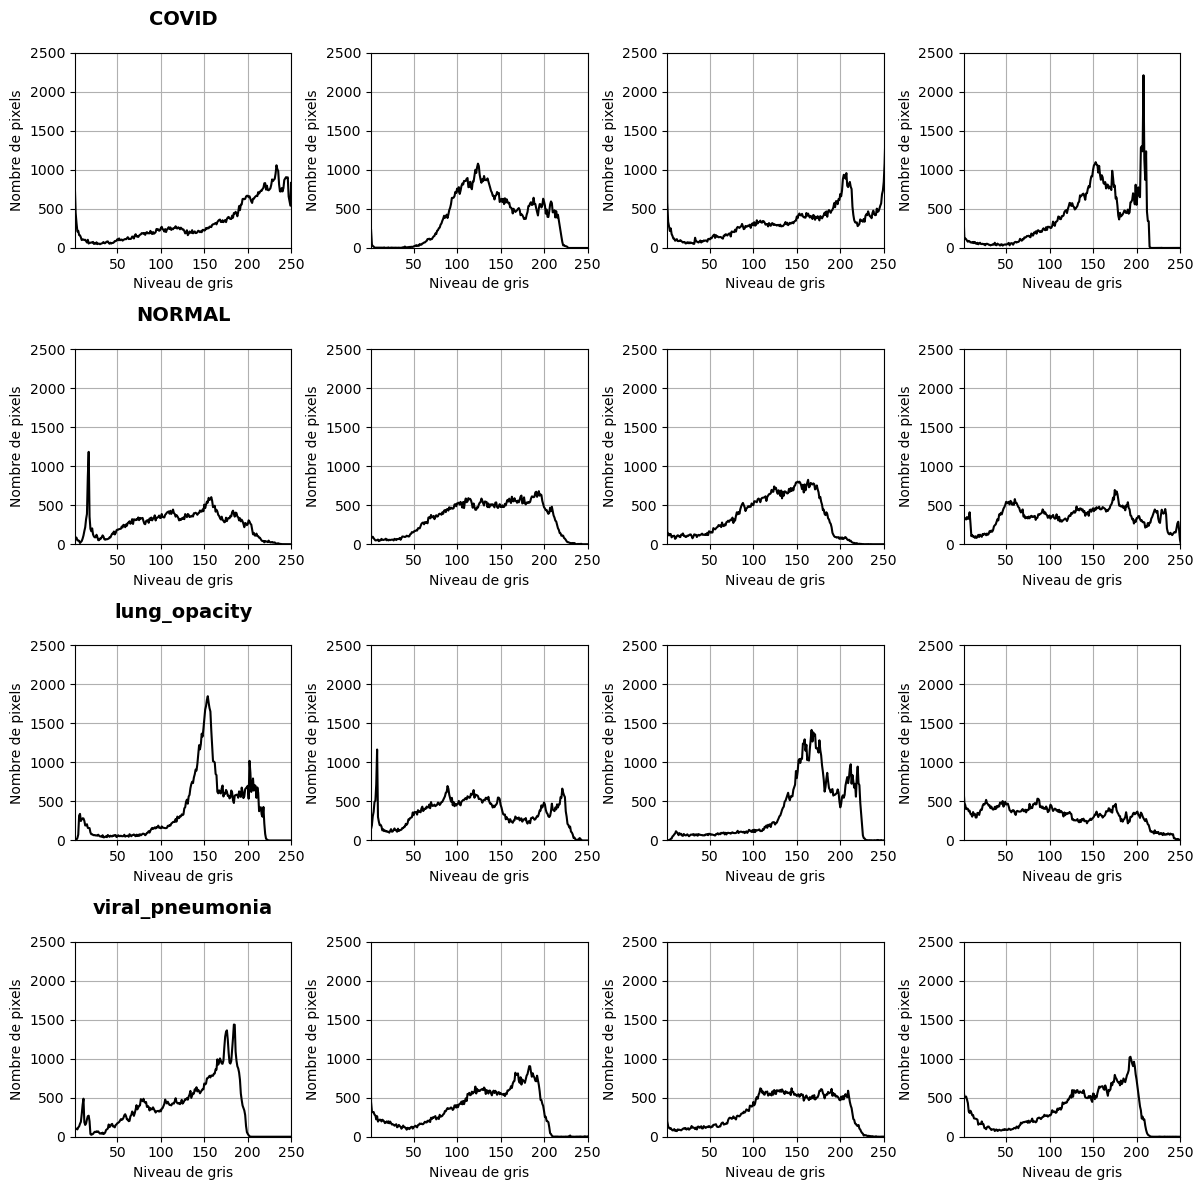

In [107]:
# Fonction pour créer un histogramme de niveaux de gris
def plot_grayscale_histogram(image_path, ax):
    # Charger l'image en niveaux de gris
    image = Image.open(image_path).convert("L")
    # Calculer l'histogramme des niveaux de gris
    histogram = image.histogram()
    # Afficher l'histogramme
    ax.plot(histogram, color='black')
    ax.set_xlabel("Niveau de gris")
    ax.set_ylabel("Nombre de pixels")
    ax.set_ylim(0, 2500)
    ax.set_xlim(1, 250) #on le fait commencer à 1 car il y a beaucoup de pixels qui ont 0 pour valeur de gris

    ax.grid(True)

# Chemin vers les répertoires contenant les images de chaque catégorie
directories = {
    "COVID": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/COVID",
    "NORMAL": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/NORMAL",
    "lung_opacity": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/lung_opacity",
    "viral_pneumonia": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/viral_pneumonia"
}

# Création de la figure
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

# Parcourir les répertoires et afficher les histogrammes de niveaux de gris de quatre images aléatoires de chaque catégorie
for i, (category, directory) in enumerate(directories.items()):
    # Lister les fichiers dans le répertoire
    files = os.listdir(directory)
    # Sélectionner quatre images aléatoires de la catégorie
    random_files = random.sample(files, 4)
    # Afficher les histogrammes de niveaux de gris
    for j, file in enumerate(random_files):
        # Construire le chemin d'accès complet de l'image
        image_path = os.path.join(directory, file)
        # Créer un histogramme de niveaux de gris pour l'image et l'afficher
        plot_grayscale_histogram(image_path, axs[i, j])
        
    # Ajouter le titre de chaque catégorie au-dessus de la ligne
    axs[i, 0].set_title(category, fontsize=14, weight='bold', pad=20)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning:

Horizontal orientation ignored with only `y` specified.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning:

Horizontal orientation ignored with only `y` specified.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning:

Horizontal orientation ignored with only `y` specified.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning:

Horizontal orientation ignored with only `y` specified.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning:

Horizontal orientation ignored with only `y` specified.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning:

Horizontal orientation ignored with only `y` specified.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning:

Horizontal orientation ignored with only `y` specified.

/opt/anaconda3/lib/python3.9/site-package

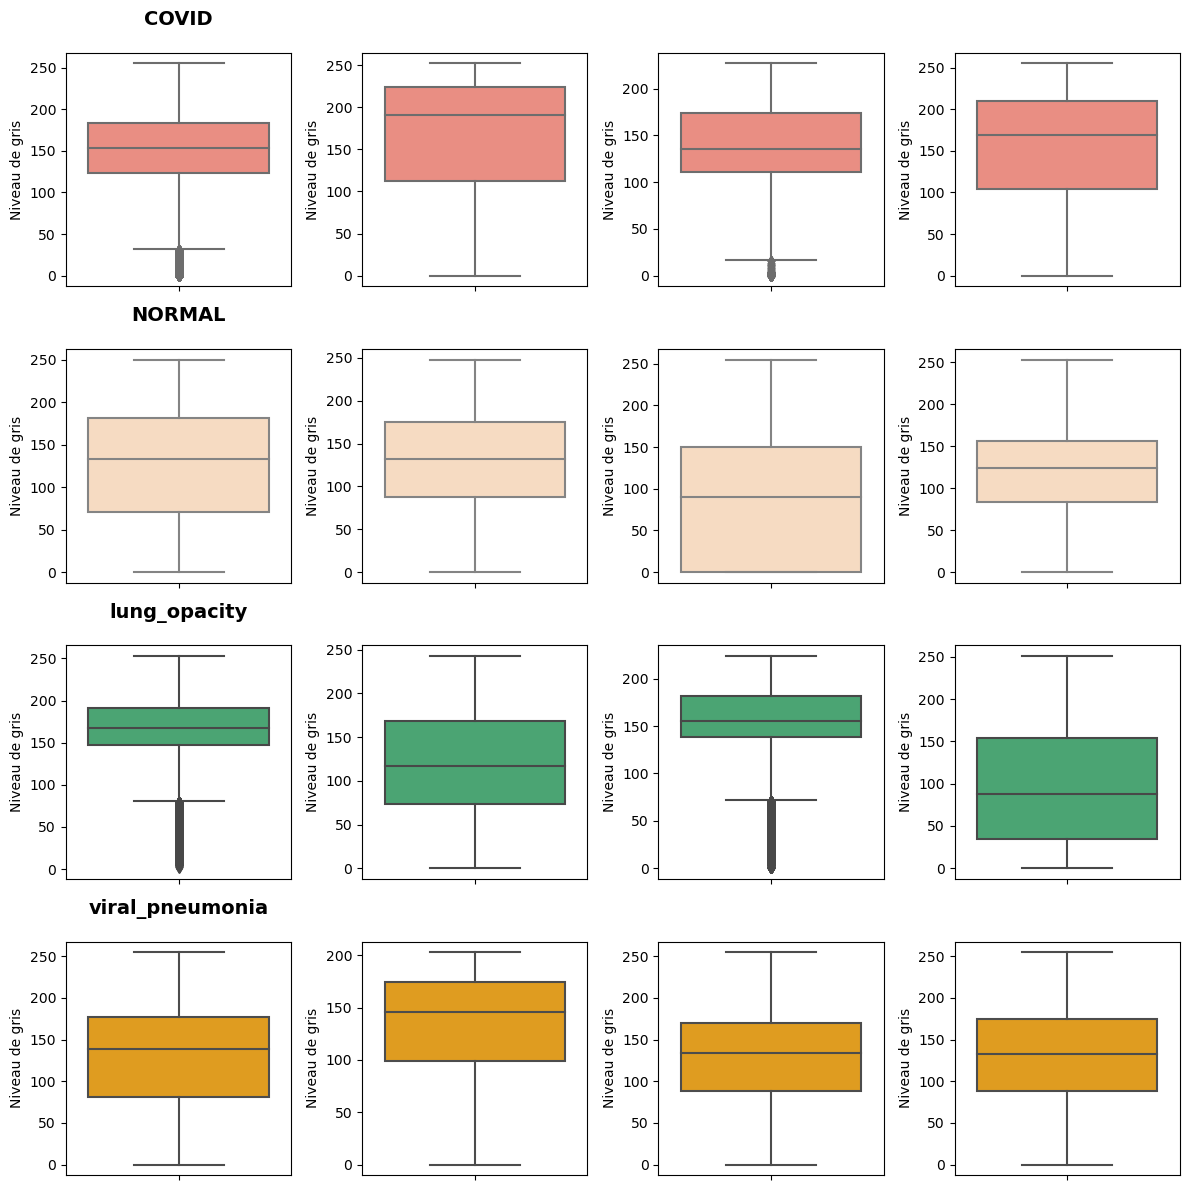

In [106]:
# Définir une palette de couleurs avec quatre couleurs
colors = ['salmon', 'peachpuff', 'mediumseagreen', 'orange']

# Fonction pour créer un boxplot de niveaux de gris avec une couleur spécifique pour chaque catégorie
def plot_grayscale_boxplot(image_path, ax, color):
    # Charger l'image en niveaux de gris
    image = Image.open(image_path).convert("L")
    # Récupérer les niveaux de gris
    grayscale_values = list(image.getdata())
    # Afficher le boxplot avec une couleur spécifique
    sns.boxplot(y=grayscale_values, ax=ax, orient='h', color=color)
    ax.set_ylabel("Niveau de gris")
    ax.set_xlabel("")

# Chemin vers les répertoires contenant les images de chaque catégorie
directories = {
    "COVID": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/COVID",
    "NORMAL": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/NORMAL",
    "lung_opacity": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/lung_opacity",
    "viral_pneumonia": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/viral_pneumonia"
}

# Création de la figure
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

# Parcourir les répertoires et afficher les boxplots de niveaux de gris de quatre images aléatoires de chaque catégorie
for i, (category, directory) in enumerate(directories.items()):
    # Lister les fichiers dans le répertoire
    files = os.listdir(directory)
    # Sélectionner quatre images aléatoires de la catégorie
    random_files = random.sample(files, 4)
    # Afficher les boxplots de niveaux de gris avec une couleur spécifique
    for j, file in enumerate(random_files):
        # Construire le chemin d'accès complet de l'image
        image_path = os.path.join(directory, file)
        # Créer un boxplot de niveaux de gris pour l'image et l'afficher
        plot_grayscale_boxplot(image_path, axs[i, j], color=colors[i])
        
    # Ajouter le titre de chaque catégorie au-dessus de la ligne
    axs[i, 0].set_title(category, fontsize=14, weight='bold', pad=20)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

Test statistique ANOVA pour vérifier s'il y a une différence significative des niveaux de gris des 4 types d'images

In [103]:
#On récupère les valeurs de niveaux de gris et on les stocke dans des listes

# Chemin vers les répertoires contenant les images de chaque catégorie
directories = {
    "COVID": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/COVID",
    "NORMAL": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/NORMAL",
    "lung_opacity": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/lung_opacity",
    "viral_pneumonia": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/viral_pneumonia"
}

# Fonction pour récupérer les niveaux de gris d'une image
def get_grayscale_values(image_path):
    # Charger l'image et la convertir en niveaux de gris
    image = Image.open(image_path).convert("L")
    # Récupérer les niveaux de gris
    grayscale_values = list(image.getdata())
    return grayscale_values

# Listes pour stocker les niveaux de gris de chaque catégorie
grayscale_values_covid = []
grayscale_values_normal = []
grayscale_values_lung_opacity = []
grayscale_values_viral_pneumonia = []

# Parcourir les répertoires et récupérer les niveaux de gris de chaque image
for category, directory in directories.items():
    # Lister les fichiers dans le répertoire
    files = os.listdir(directory)
    # Récupérer les niveaux de gris de chaque image
    for file in files:
        # Construire le chemin d'accès complet de l'image
        image_path = os.path.join(directory, file)
        # Récupérer les niveaux de gris de l'image
        grayscale_values = get_grayscale_values(image_path)
        # Ajouter les niveaux de gris à la liste correspondante en fonction de la catégorie
        if category == "COVID":
            grayscale_values_covid.extend(grayscale_values)
        elif category == "NORMAL":
            grayscale_values_normal.extend(grayscale_values)
        elif category == "lung_opacity":
            grayscale_values_lung_opacity.extend(grayscale_values)
        elif category == "viral_pneumonia":
            grayscale_values_viral_pneumonia.extend(grayscale_values)

# Vérification
print("Nombre de niveaux de gris pour la catégorie COVID :", len(grayscale_values_covid))
print("Nombre de niveaux de gris pour la catégorie NORMAL :", len(grayscale_values_normal))
print("Nombre de niveaux de gris pour la catégorie lung_opacity :", len(grayscale_values_lung_opacity))
print("Nombre de niveaux de gris pour la catégorie viral_pneumonia :", len(grayscale_values_viral_pneumonia))


Nombre de niveaux de gris pour la catégorie COVID : 357604
Nombre de niveaux de gris pour la catégorie NORMAL : 357604
Nombre de niveaux de gris pour la catégorie lung_opacity : 357604
Nombre de niveaux de gris pour la catégorie viral_pneumonia : 357604


In [113]:
# Création d'un DataFrame avec les niveaux de gris pour chaque catégorie
data = pd.DataFrame({
    'COVID': grayscale_values_covid,
    'NORMAL': grayscale_values_normal,
    'lung_opacity': grayscale_values_lung_opacity,
    'viral_pneumonia': grayscale_values_viral_pneumonia
})

# Test de Levene pour l'homoscédasticité
levene_statistic, levene_pvalue = levene(grayscale_values_covid, grayscale_values_normal, grayscale_values_lung_opacity, grayscale_values_viral_pneumonia)
print("Test de Levene pour l'homoscédasticité - Statistique :", levene_statistic)
print("P-valeur :", levene_pvalue)

# Test de Shapiro-Wilk pour la normalité des données
shapiro_statistic, shapiro_pvalue = shapiro(data.stack())
print("Test de Shapiro-Wilk pour la normalité des données - Statistique :", shapiro_statistic)
print("P-valeur :", shapiro_pvalue)

# Si les hypothèses sont satisfaites, effectuer l'ANOVA
if levene_pvalue > 0.05 and shapiro_pvalue > 0.05:
    # ANOVA
    anova_result = f_oneway(grayscale_values_covid, grayscale_values_normal, grayscale_values_lung_opacity, grayscale_values_viral_pneumonia)
    print("\nTest ANOVA - Statistique :", anova_result.statistic)
    print("P-valeur :", anova_result.pvalue)
    
    # Test de Tukey pour les comparaisons multiples
    tukey_result = pairwise_tukeyhsd(data.stack(), data.index.get_level_values(1))
    print("\nTest de Tukey pour les comparaisons multiples :\n", tukey_result)

else:
    # Test de Kruskal-Wallis
    kruskal_result = kruskal(grayscale_values_covid, grayscale_values_normal, grayscale_values_lung_opacity, grayscale_values_viral_pneumonia)
    print("Test de Kruskal-Wallis - Statistique :", kruskal_result.statistic)
    print("P-valeur :", kruskal_result.pvalue)



Test de Levene pour l'homoscédasticité - Statistique : 1485.6682427549783
P-valeur : 0.0
Test de Shapiro-Wilk pour la normalité des données - Statistique : 0.9516031742095947
P-valeur : 0.0
Test de Kruskal-Wallis - Statistique : 64322.228967279036
P-valeur : 0.0


Utilisation des masques associés aux images

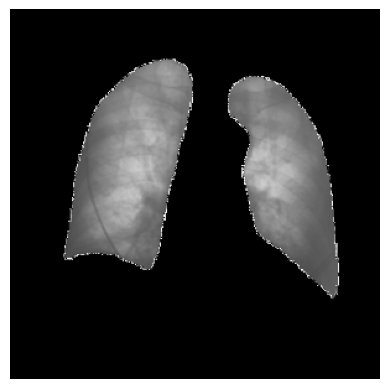

In [148]:


# Charger l'image radiographique et le masque 

image = Image.open('/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/COVID/COVID-1.png') 
mask = Image.open('/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/COVID-1.png') 

#Redimensionner le masque à la même taille que l'image
mask = mask.resize(image.size, resample=Image.Resampling.BILINEAR)

# Convertir les images en tableaux numpy 
image_np = np.array(image) 
mask_np = np.array(mask) 

#Le masque a trois canaux alors que l'image en a 2, du coup on leur donne le même nombre de canaux
image_np = np.stack((image_np,) * 3, axis=-1)

# Appliquer le masque sur l'image 
segmented_image_np = image_np * mask_np

#Afficher l'image
plt.imshow(segmented_image_np.astype('uint8'))
plt.axis('off')
plt.show()

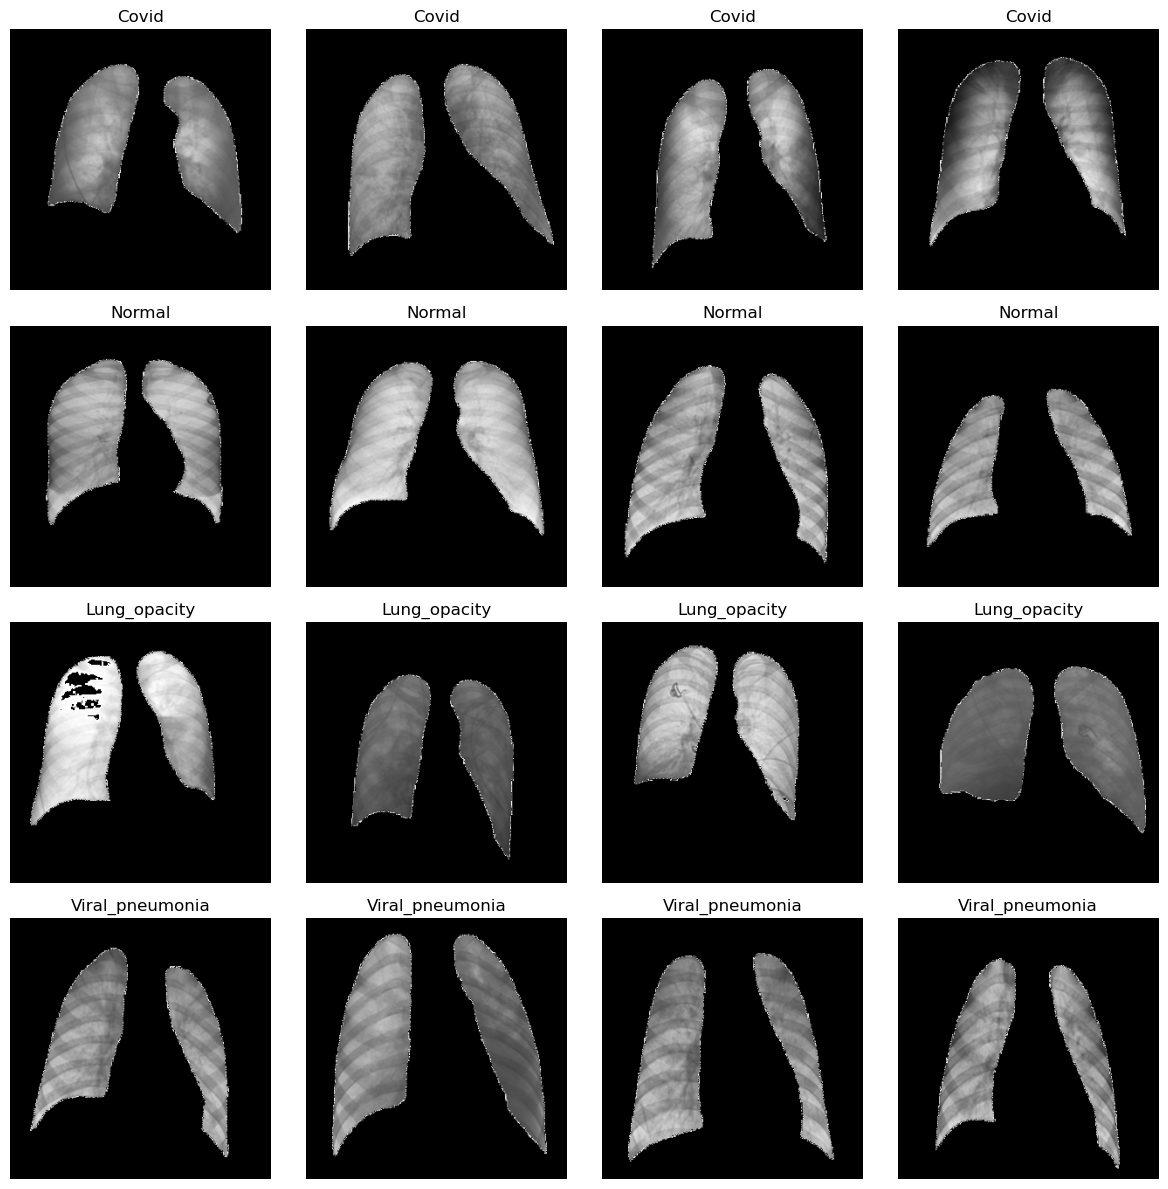

In [156]:
# Dossier contenant les images et les masques pour chaque type
image_folder = {
    "COVID": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/COVID",
    "NORMAL": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/NORMAL",
    "lung_opacity": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/lung_opacity",
    "viral_pneumonia": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/viral_pneumonia"
}

mask_folder = {
    'COVID': '/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/COVID_mask',
    'NORMAL': '/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/NORMAL_mask',
    'lung_opacity': '/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/lung_opacity_mask',
    'viral_pneumonia': '/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/viral_pneumonia_mask'
}

# Créer une nouvelle figure
plt.figure(figsize=(12, 12))

# Itérer sur chaque type d'image
for i, category in enumerate(image_folder.keys(), 1):
    # Chemins des dossiers d'images et de masques
    image_dir = image_folder[category]
    mask_dir = mask_folder[category]
    
    # Liste des noms de fichiers dans les dossiers
    image_files = sorted(os.listdir(image_dir))
    mask_files = sorted(os.listdir(mask_dir))
    
    # Afficher les quatre premières images et leurs masques
    for j in range(4):
        # Charger l'image et le masque correspondant
        image_file = os.path.join(image_dir, image_files[j])
        mask_file = os.path.join(mask_dir, mask_files[j])
        image = Image.open(image_file).convert('RGB')
        mask = Image.open(mask_file).convert('L')
        
        # Redimensionner le masque pour correspondre à la taille de l'image
        mask = mask.resize(image.size, resample=Image.Resampling.BILINEAR)
        
        # Convertir les images en tableaux numpy
        image_np = np.array(image)
        mask_np = np.array(mask)
        
        # Dupliquer le masque pour avoir 3 canaux
        mask_np = np.expand_dims(mask_np, axis=-1)
        mask_np = np.concatenate([mask_np] * 3, axis=-1)
        
        # Appliquer le masque sur l'image
        segmented_image_np = image_np * mask_np
        
        # Ajouter la subplot pour l'image
        plt.subplot(4, 4, (i-1)*4 + j + 1)
        plt.imshow(segmented_image_np.astype('uint8'))
        plt.title(category.capitalize())  # Afficher le titre avec la catégorie en majuscules
        plt.axis('off')  # Désactiver les axes

# Ajuster l'espacement entre les subplots
plt.tight_layout()
plt.show()

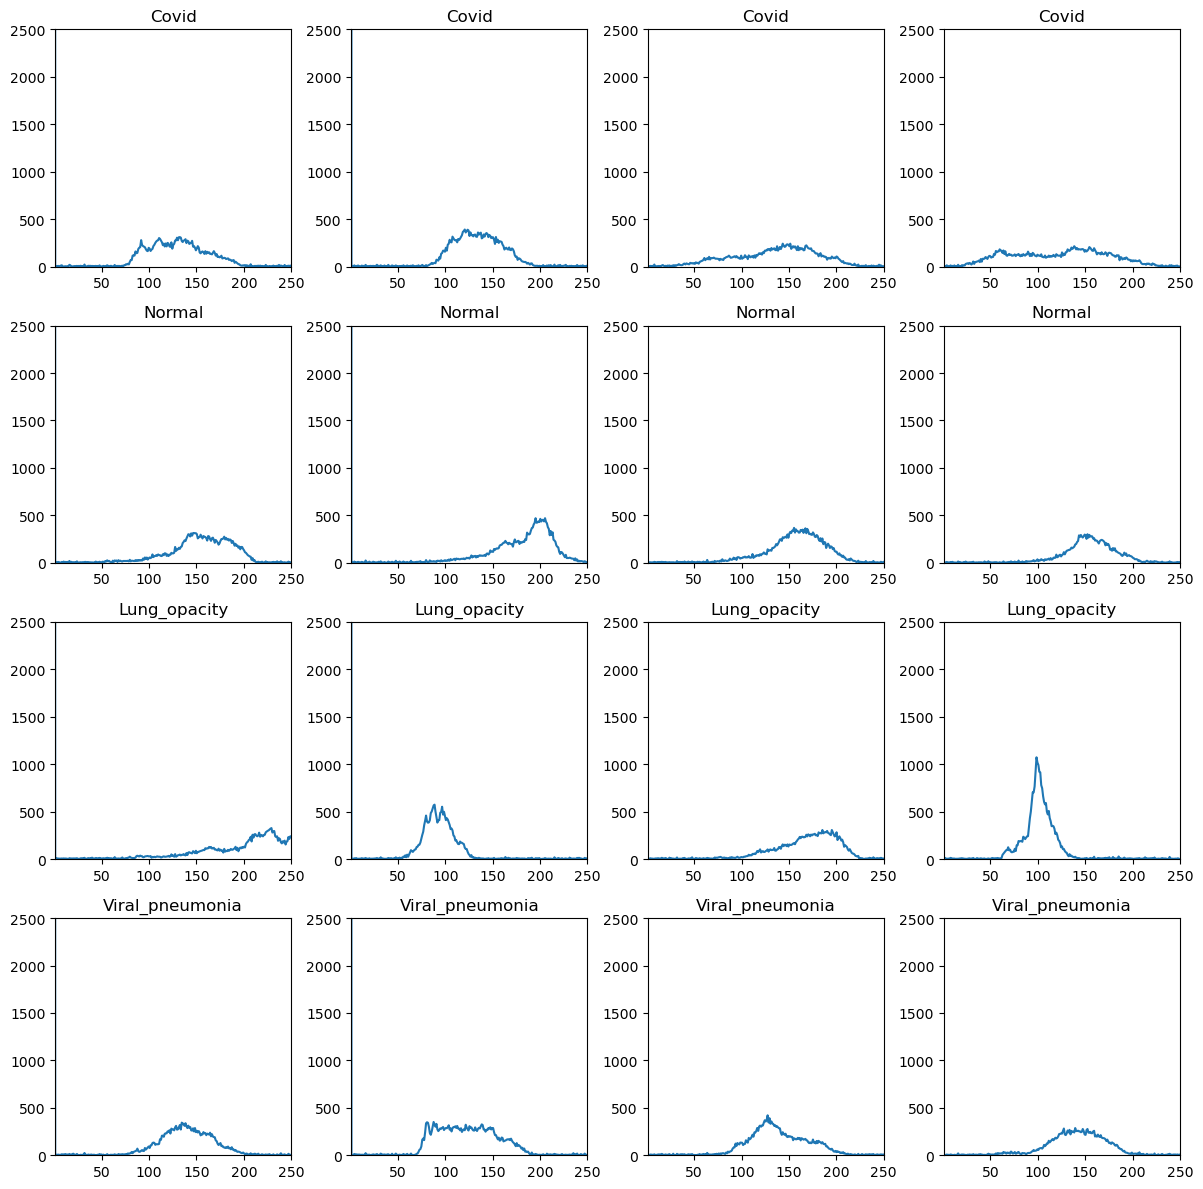

In [167]:
# Dossier contenant les images et les masques pour chaque type
image_folder = {
    "COVID": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/COVID",
    "NORMAL": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/NORMAL",
    "lung_opacity": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/lung_opacity",
    "viral_pneumonia": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/viral_pneumonia"
}

mask_folder = {
    'COVID': '/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/COVID_mask',
    'NORMAL': '/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/NORMAL_mask',
    'lung_opacity': '/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/lung_opacity_mask',
    'viral_pneumonia': '/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/viral_pneumonia_mask'
}

# Créer une nouvelle figure
plt.figure(figsize=(12, 12))

# Itérer sur chaque type d'image
for i, category in enumerate(image_folder.keys(), 1):
    # Chemins des dossiers d'images et de masques
    image_dir = image_folder[category]
    mask_dir = mask_folder[category]
    
    # Liste des noms de fichiers dans les dossiers
    image_files = sorted(os.listdir(image_dir))
    mask_files = sorted(os.listdir(mask_dir))
    
    # Afficher les quatre premières images et leurs masques
    for j in range(4):
        # Charger l'image et le masque correspondant
        image_file = os.path.join(image_dir, image_files[j])
        mask_file = os.path.join(mask_dir, mask_files[j])
        image = Image.open(image_file).convert('RGB')
        mask = Image.open(mask_file).convert('L')
        
        # Redimensionner le masque pour correspondre à la taille de l'image
        mask = mask.resize(image.size, resample=Image.Resampling.BILINEAR)
        
        # Convertir les images en tableaux numpy
        image_np = np.array(image)
        mask_np = np.array(mask)
        
        # Dupliquer le masque pour avoir 3 canaux
        mask_np = np.expand_dims(mask_np, axis=-1)
        mask_np = np.concatenate([mask_np] * 3, axis=-1)
        
        # Appliquer le masque sur l'image
        segmented_image_np = image_np * mask_np
        
        # Calculer l'histogramme de niveaux de gris
        gray_histogram = np.histogram(segmented_image_np[:,:,0], bins=256, range=(0, 255))
        
        # Ajouter la subplot pour l'histogramme
        plt.subplot(4, 4, (i-1)*4 + j + 1)
        plt.plot(gray_histogram[1][:-1], gray_histogram[0])
        plt.title(category.capitalize())
        plt.ylim(0,2500)
        plt.xlim(1,250)

# Ajuster l'espacement entre les subplots
plt.tight_layout()
plt.show()

Test statistique ANOVA pour vérifier s'il y a une différence significative des niveaux de gris des 4 types de segmentations

In [184]:


# Chemin vers les répertoires contenant les images de chaque catégorie
directories = {
    "COVID": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/COVID",
    "NORMAL": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/NORMAL",
    "lung_opacity": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/lung_opacity",
    "viral_pneumonia": "/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/viral_pneumonia"
}

mask_folders = {
    'COVID': '/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/COVID_mask',
    'NORMAL': '/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/NORMAL_mask',
    'lung_opacity': '/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/lung_opacity_mask',
    'viral_pneumonia': '/Users/Mac/Desktop/DataScientest/Projet_Datascientest/Exploration_DataViz/viral_pneumonia_mask'
}

# Fonction pour récupérer les niveaux de gris d'une image segmentée
def get_segmented_grayscale_values(image_path, mask_path):
    # Charger l'image et le masque
    image = Image.open(image_path).convert("RGB")
    mask = Image.open(mask_path).convert("L")
    # Redimensionner le masque pour correspondre aux dimensions de l'image
    mask = mask.resize(image.size, resample=Image.Resampling.BILINEAR)
    # Appliquer le masque sur l'image pour segmenter
    segmented_image = ImageChops.composite(image, Image.new("RGB", image.size, "black"), mask)
    # Récupérer les niveaux de gris de l'image segmentée
    grayscale_values = list(segmented_image.convert("L").getdata())
    return grayscale_values

# Listes pour stocker les niveaux de gris de chaque catégorie
grayscale_values_covid = []
grayscale_values_normal = []
grayscale_values_lung_opacity = []
grayscale_values_viral_pneumonia = []

# Parcourir les répertoires et récupérer les niveaux de gris de chaque image segmentée
for category, directory in directories.items():
    # Récupérer le répertoire des masques correspondant à la catégorie
    mask_folder = mask_folders[category]
    # Lister les fichiers dans le répertoire des images
    files = os.listdir(directory)
    # Récupérer les niveaux de gris de chaque image segmentée
    for file in files:
        # Construire le chemin d'accès complet de l'image et du masque
        image_path = os.path.join(directory, file)
        mask_path = os.path.join(mask_folder, file)
        # Récupérer les niveaux de gris de l'image segmentée
        grayscale_values = get_segmented_grayscale_values(image_path, mask_path)
        # Ajouter les niveaux de gris à la liste correspondante en fonction de la catégorie
        if category == "COVID":
            grayscale_values_covid.extend(grayscale_values)
        elif category == "NORMAL":
            grayscale_values_normal.extend(grayscale_values)
        elif category == "lung_opacity":
            grayscale_values_lung_opacity.extend(grayscale_values)
        elif category == "viral_pneumonia":
            grayscale_values_viral_pneumonia.extend(grayscale_values)

# Vérification
print("Nombre de niveaux de gris pour la catégorie COVID :", len(grayscale_values_covid))
print("Nombre de niveaux de gris pour la catégorie NORMAL :", len(grayscale_values_normal))
print("Nombre de niveaux de gris pour la catégorie lung_opacity :", len(grayscale_values_lung_opacity))
print("Nombre de niveaux de gris pour la catégorie viral_pneumonia :", len(grayscale_values_viral_pneumonia))


Nombre de niveaux de gris pour la catégorie COVID : 357604
Nombre de niveaux de gris pour la catégorie NORMAL : 357604
Nombre de niveaux de gris pour la catégorie lung_opacity : 357604
Nombre de niveaux de gris pour la catégorie viral_pneumonia : 357604


In [185]:
data = pd.DataFrame({
    'COVID': grayscale_values_covid,
    'NORMAL': grayscale_values_normal,
    'lung_opacity': grayscale_values_lung_opacity,
    'viral_pneumonia': grayscale_values_viral_pneumonia
})

# Test de Levene pour l'homoscédasticité
levene_statistic, levene_pvalue = levene(grayscale_values_covid, grayscale_values_normal, grayscale_values_lung_opacity, grayscale_values_viral_pneumonia)
print("Test de Levene pour l'homoscédasticité - Statistique :", levene_statistic)
print("P-valeur :", levene_pvalue)

# Test de Shapiro-Wilk pour la normalité des données
shapiro_statistic, shapiro_pvalue = shapiro(data.stack())
print("Test de Shapiro-Wilk pour la normalité des données - Statistique :", shapiro_statistic)
print("P-valeur :", shapiro_pvalue)

# Si les hypothèses sont satisfaites, effectuer l'ANOVA
if levene_pvalue > 0.05 and shapiro_pvalue > 0.05:
    # ANOVA
    anova_result = f_oneway(grayscale_values_covid, grayscale_values_normal, grayscale_values_lung_opacity, grayscale_values_viral_pneumonia)
    print("\nTest ANOVA - Statistique :", anova_result.statistic)
    print("P-valeur :", anova_result.pvalue)
    
    # Test de Tukey pour les comparaisons multiples
    tukey_result = pairwise_tukeyhsd(data.stack(), data.index.get_level_values(1))
    print("\nTest de Tukey pour les comparaisons multiples :\n", tukey_result)

else:
    # Test de Kruskal-Wallis
    kruskal_result = kruskal(grayscale_values_covid, grayscale_values_normal, grayscale_values_lung_opacity, grayscale_values_viral_pneumonia)
    print("Test de Kruskal-Wallis - Statistique :", kruskal_result.statistic)
    print("P-valeur :", kruskal_result.pvalue)



Test de Levene pour l'homoscédasticité - Statistique : 2398.9866444875947
P-valeur : 0.0


/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning:

p-value may not be accurate for N > 5000.



Test de Shapiro-Wilk pour la normalité des données - Statistique : 0.5768511891365051
P-valeur : 0.0
Test de Kruskal-Wallis - Statistique : 1965.1988125329578
P-valeur : 0.0
